<a href="https://colab.research.google.com/github/43pratik/ML_lab/blob/main/Prac_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_csv("Mall_Customers.csv")

In [4]:
# Drop CustomerID as it's not useful for clustering
df.drop(columns=['CustomerID'], inplace=True)

# Handle categorical data (One-Hot Encoding)
df = pd.get_dummies(df, columns=['Genre'], drop_first=True)

In [5]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standardize numerical features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)

In [6]:
# Elbow method to determine optimal k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

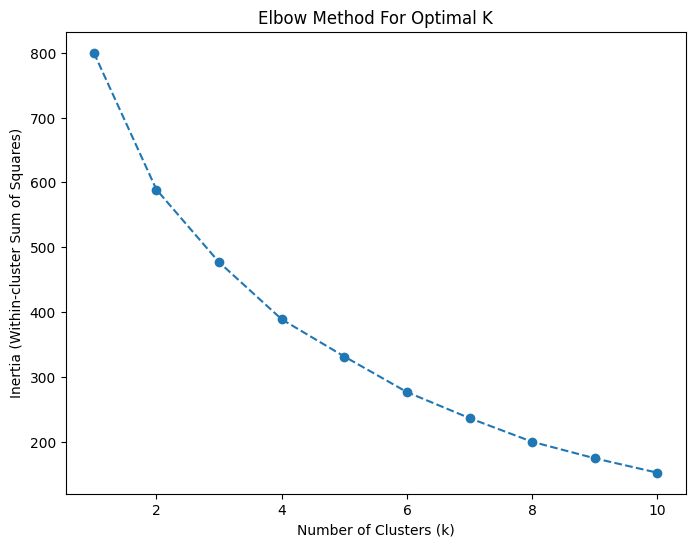

In [7]:
# Plot the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.show()


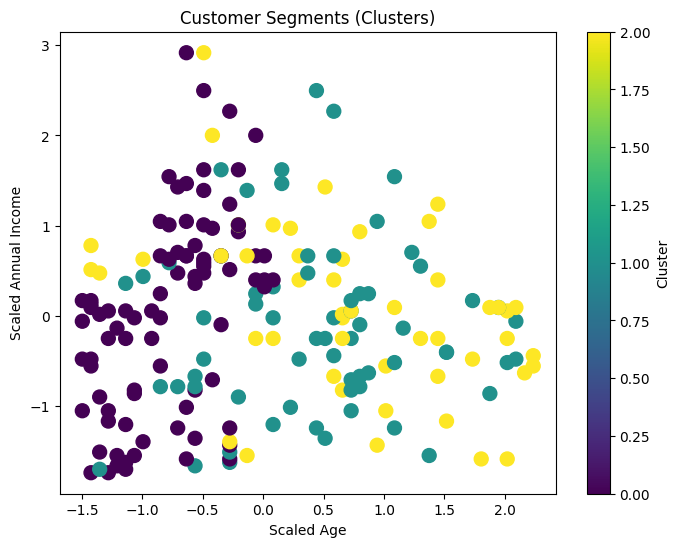

In [9]:
# Optimal k chosen based on the elbow method
optimal_k = 3

# Fit KMeans with optimal k
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)

# Scatter plot of clusters
plt.figure(figsize=(8,6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.title('Customer Segments (Clusters)')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.colorbar(label='Cluster')
plt.show()

In [10]:
# Print cluster centers
print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

# Display clustered data
df_clustered = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']]
print(df_clustered)

Cluster Centers (scaled):
[[-0.77529133  0.04688104  0.88056434  0.03792108]
 [ 0.44680201 -0.10812358 -0.5442077  -0.88640526]
 [ 0.74307816  0.06431159 -0.79449512  1.12815215]]
     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        0
1     21                  15                      81        0
2     20                  16                       6        1
3     23                  16                      77        0
4     31                  17                      40        1
..   ...                 ...                     ...      ...
195   35                 120                      79        0
196   45                 126                      28        1
197   32                 126                      74        0
198   32                 137                      18        2
199   30                 137                      83        0

[200 rows x 4 columns]


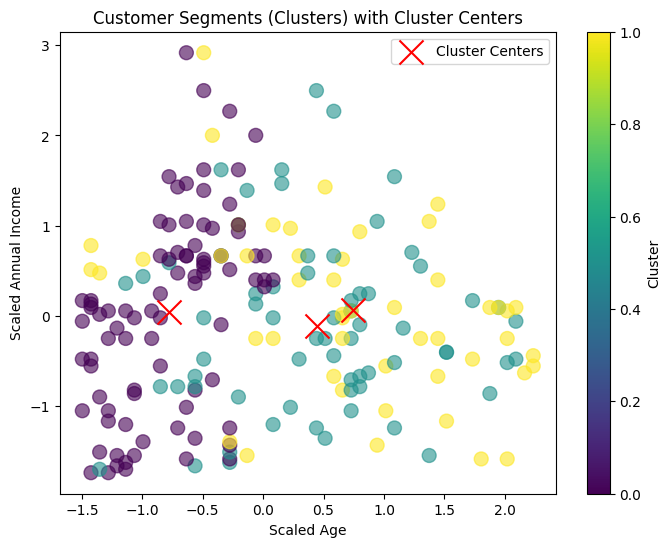

In [11]:
# Scatter plot with cluster centers
plt.figure(figsize=(8,6))
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=100, alpha=0.6)
cluster_centers = kmeans.cluster_centers_

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=300, c='red', marker='x', label='Cluster Centers')

plt.title('Customer Segments (Clusters) with Cluster Centers')
plt.xlabel('Scaled Age')
plt.ylabel('Scaled Annual Income')
plt.colorbar(label='Cluster')

plt.legend()
plt.show()
